In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
potato_data=pd.read_csv(r"C:\Users\1dt20\Desktop\internship project\Potatofinal3.csv")
potato_data.info()
potato_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1827 entries, 0 to 1826
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Sl no.        1827 non-null   int64 
 1   DistrictName  1827 non-null   object
 2   MarketName    1827 non-null   object
 3   Commodity     1827 non-null   object
 4   Variety       1827 non-null   object
 5   Grade         1827 non-null   object
 6   min_price     1827 non-null   int64 
 7   max_price     1827 non-null   int64 
 8   modal_price   1827 non-null   int64 
 9   PriceDate     1827 non-null   object
dtypes: int64(4), object(6)
memory usage: 142.9+ KB


,Sl no.,DistrictName,MarketName,Commodity,Variety,Grade,min_price,max_price,modal_price,PriceDate
0,1,Agra,Achnera,Potato,Desi,FAQ,900,1000,950,30-Dec-20
1,2,Agra,Achnera,Potato,Desi,FAQ,800,900,850,29-Dec-20
2,3,Agra,Achnera,Potato,Desi,FAQ,850,950,900,28-Dec-20
3,4,Agra,Achnera,Potato,Desi,FAQ,800,900,850,27-Dec-20
4,5,Agra,Achnera,Potato,Desi,FAQ,800,900,850,26-Dec-20


In [3]:
print("Number of potato Markets:", len(potato_data['MarketName'].unique()))
print("Number of Districts:", len(potato_data['DistrictName'].unique()))
#print("Number of States:", len(potato_data['state'].unique()))
print("Number of Varieties:", len(potato_data['Variety'].unique()))


Number of potato Markets: 8
Number of Districts: 1
Number of Varieties: 4


In [4]:
min_price=list(potato_data.min_price)
max_price =list(potato_data.max_price)
model_price =list(potato_data.modal_price)
arr =[list(potato_data.MarketName),list(potato_data.DistrictName), list(potato_data.Variety)]
index =pd.MultiIndex.from_arrays(arr, names=('MarketName','DistrictName','Variety'))
potato_df = pd.DataFrame({'minimum_price':min_price,'maximum_price':max_price,'modal_price':model_price}, index=index)
potato_df.head()

minimum_price  maximum_price  modal_price
MarketName DistrictName Variety                                           
Achnera    Agra         Desi               900           1000          950
                        Desi               800            900          850
                        Desi               850            950          900
                        Desi               800            900          850
                        Desi               800            900          850

In [5]:
potato_df2=potato_df.groupby(level=2,sort=False).mean().reset_index()
potato_df2.head()

,Variety,minimum_price,maximum_price,modal_price
0,Desi,1403.719824,1515.940015,1458.888076
1,Potato,2050.000000,2150.000000,2100.000000
2,Local,1358.427948,1536.681223,1518.788210
3,Other,1550.000000,1650.000000,1600.000000


In [6]:
print("national average modal price of potato:", round(potato_df2['modal_price'].mean()))

national average modal price of potato: 1669


In [7]:
potato_df2[potato_df2['modal_price']>1669]

,Variety,minimum_price,maximum_price,modal_price
1,Potato,2050.0,2150.0,2100.0


In [8]:
potato_df2[potato_df2['modal_price']<1669].sort_values('modal_price',ascending=True)[0:5]

,Variety,minimum_price,maximum_price,modal_price
0,Desi,1403.719824,1515.940015,1458.888076
2,Local,1358.427948,1536.681223,1518.788210
3,Other,1550.000000,1650.000000,1600.000000


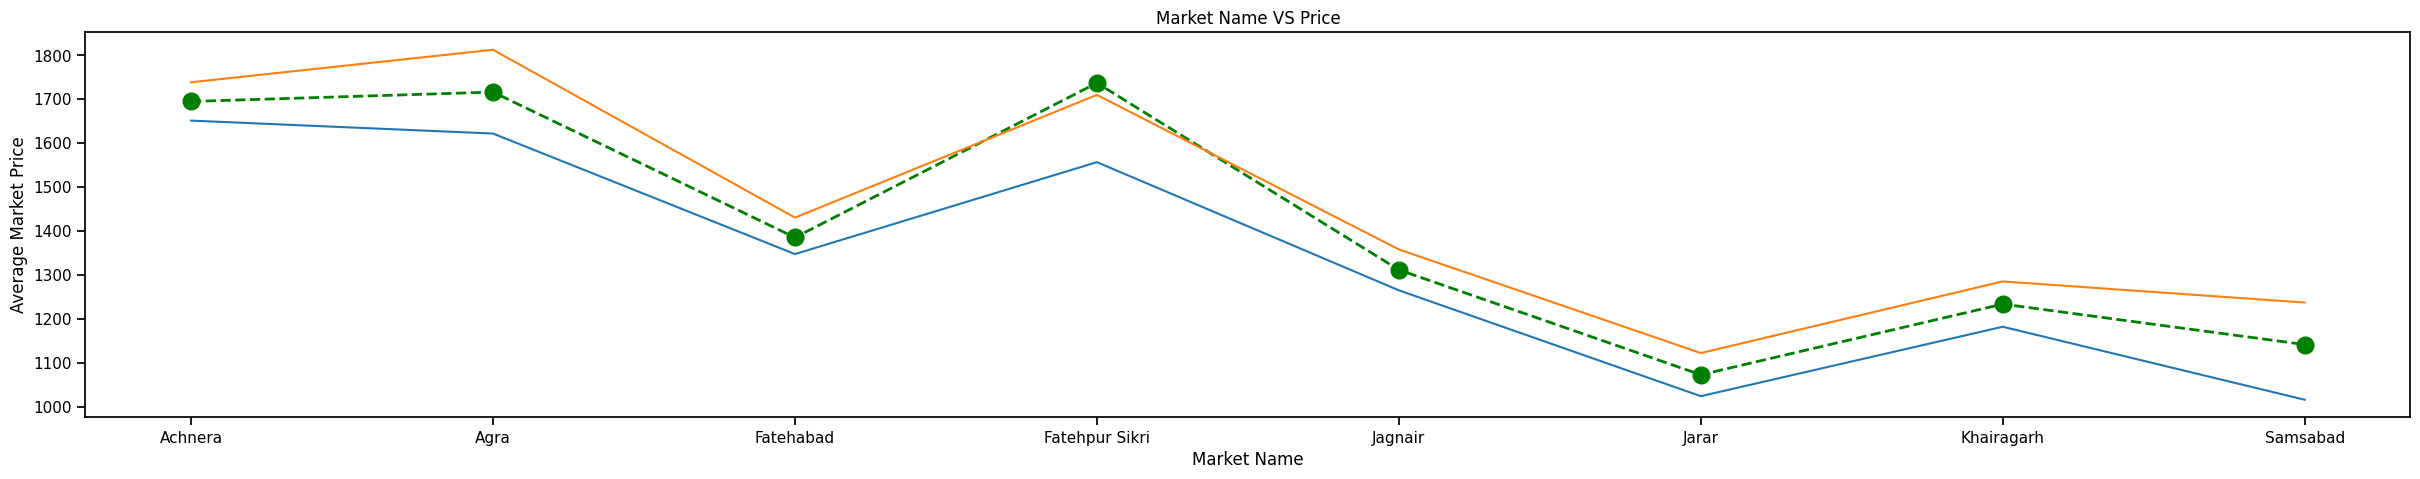

In [9]:
potato_df3=potato_df.groupby(level=0).mean().reset_index()

plt.figure(figsize=(30,5))
sns.set_context("notebook", font_scale=1)
plt.plot(potato_df3['MarketName'],potato_df3['modal_price'],color='green', marker='o', linestyle='dashed',linewidth=2, markersize=12)
plt.plot(potato_df3['MarketName'],potato_df3['minimum_price'])
plt.plot(potato_df3['MarketName'],potato_df3['maximum_price'])
plt.title("Market Name VS Price")
plt.xlabel("Market Name")
plt.ylabel("Average Market Price")
plt.show()


In [10]:
potato_df3.sort_values('modal_price',ascending=False)[0:5]

,MarketName,minimum_price,maximum_price,modal_price
3,Fatehpur Sikri,1556.931034,1710.172414,1737.344828
1,Agra,1622.122807,1813.017544,1716.614035
0,Achnera,1651.633987,1738.921569,1695.212418
2,Fatehabad,1347.596899,1430.658915,1385.387597
4,Jagnair,1265.026738,1358.181818,1311.711230


In [11]:
potato_df3.sort_values('modal_price')[0:5]

,MarketName,minimum_price,maximum_price,modal_price
5,Jarar,1023.904110,1122.123288,1072.671233
7,Samsabad,1015.773810,1237.202381,1141.517857
6,Khairagarh,1182.085561,1285.294118,1233.689840
4,Jagnair,1265.026738,1358.181818,1311.711230
2,Fatehabad,1347.596899,1430.658915,1385.387597


In [12]:
print("Expensive potato producing states:",potato_data[(potato_data.Variety=='Desi')|(potato_data.Variety=='Local')])

Expensive potato producing states:       Sl no. DistrictName MarketName Commodity Variety Grade  min_price  \
0          1         Agra    Achnera    Potato    Desi   FAQ        900   
1          2         Agra    Achnera    Potato    Desi   FAQ        800   
2          3         Agra    Achnera    Potato    Desi   FAQ        850   
3          4         Agra    Achnera    Potato    Desi   FAQ        800   
4          5         Agra    Achnera    Potato    Desi   FAQ        800   
...      ...          ...        ...       ...     ...   ...        ...   
1822    1823         Agra   Samsabad    Potato   Local   FAQ       1000   
1823    1824         Agra   Samsabad    Potato   Local   FAQ       1000   
1824    1825         Agra   Samsabad    Potato   Local   FAQ       1100   
1825    1826         Agra   Samsabad    Potato   Local   FAQ       1100   
1826    1827         Agra   Samsabad    Potato   Local   FAQ       1100   

      max_price  modal_price  PriceDate  
0          1000       

In [13]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_arr3 = scaler.fit_transform(potato_data[['modal_price','min_price','max_price']])

clusters = KMeans(5,random_state=42)# we've got k=5 using elbow plot
kmeans_model= clusters.fit(scaled_arr3)
potato_data['cluster_id']= kmeans_model.labels_
potato_data1 = potato_data.sort_values(['modal_price','cluster_id'])
potato_data1.head()

c:\Users\1dt20\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\1dt20\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\1dt20\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\1dt20\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning:

,Sl no.,DistrictName,MarketName,Commodity,Variety,Grade,min_price,max_price,modal_price,PriceDate,cluster_id
764,765,Agra,Fatehabad,Potato,Desi,FAQ,500,600,550,11-May-20,0
816,817,Agra,Fatehabad,Potato,Desi,FAQ,500,600,550,13-Feb-20,0
1444,1445,Agra,Jarar,Potato,Desi,FAQ,600,700,650,03-Feb-20,0
1445,1446,Agra,Jarar,Potato,Desi,FAQ,600,700,650,02-Feb-20,0
1432,1433,Agra,Jarar,Potato,Desi,FAQ,640,720,680,17-Feb-20,0


In [14]:
potato_clusters = potato_data1.groupby('cluster_id')[['modal_price','min_price','max_price']].agg(['mean','std']).reset_index()
potato_clusters

cluster_id  modal_price                min_price                max_price  \
                     mean         std         mean         std         mean   
0          0   975.000000  129.607542   912.992832  125.971285  1036.254480   
1          1  1968.244275  150.911564  1900.973282  151.769598  2035.648855   
2          2  1338.369705  111.244592  1275.481386  124.406532  1398.600770   
3          3  2673.023810  205.514349  2588.285714  204.458473  2756.238095   
4          4  1663.888889  773.731515     0.000000    0.000000     0.000000   

               
          std  
0  134.415898  
1  156.271692  
2  109.637020  
3  213.528436  
4    0.000000

c:\Users\1dt20\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\1dt20\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\1dt20\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


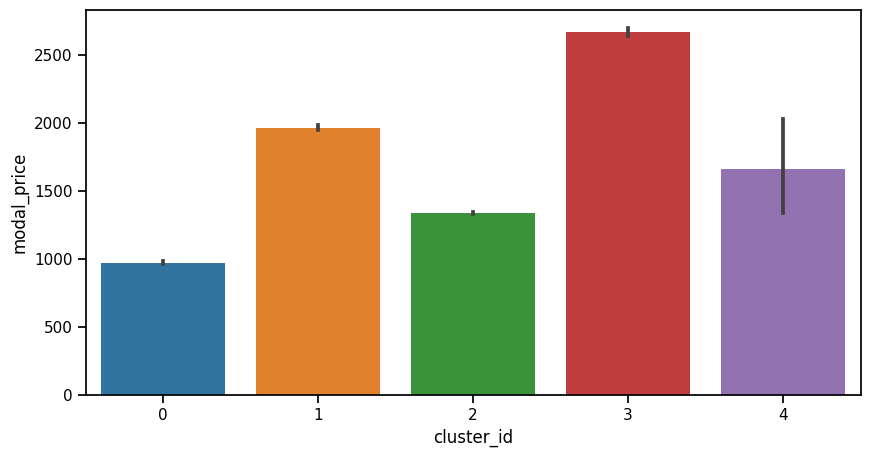

In [16]:


plt.figure(figsize=(10, 5))
sns.set_context("notebook", font_scale=1)
sns.barplot(x='cluster_id', y='modal_price', data=potato_data1)
plt.show()
